## Configure the code
- Import the libraries and configure the dictionary 

In [34]:
import glob
import cv2 
from cv2 import aruco 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

arucoDict = cv2.aruco.Dictionary_get(aruco.DICT_4X4_250)

## Create the Charuco board

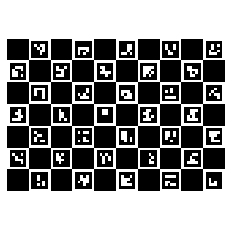

In [51]:
board = aruco.CharucoBoard_create(10, 7, .03, .023, arucoDict)
myboard = board.draw((2000, 2000))

patternSize = (10,7)
squareSize = (.03)
#Show the board
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(myboard, cmap = mpl.cm.gray, interpolation = "nearest")
ax.axis("off")
plt.show()

#Save the board
#cv2.imwrite("charuco.tiff", myboard)

## After create the image, we need to take pictures of it
- Make sure that you take a lot of images with differents angles
- It's important that you have a light source behind your camera
- The pattern must cover most of the image (at least a half)

### Now import the images to the code

In [52]:
images = glob.glob("*jpg")
print("Images uploaded")

Images uploaded


## Fuction to detect the charuto corners

In [53]:
def detectCharucoCorners(images):
    allCorners = []
    allIds = []
    decimator = 0
    #subpixel corner detection criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.00001)
    
    for image in images:
        print("=> Processing image {0}".format(image))
        frame = cv2.imread(image)
        grayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(grayFrame, arucoDict)
        print(corners)
           
        
        
        # if the corners are valid 
        if len(corners)>0:
            print("Corners detected")
            for corner in corners:
                # do the subpixel detection
                cv2.cornerSubPix(grayFrame, corner, winSize = (3,3), zeroZone = (-1,-1), criteria = criteria)
            
            # returns the 2D position of the chessboard corners from a ChArUco board using the detected Aruco markers
            interpolatedCorners = cv2.aruco.interpolateCornersCharuco(corners, ids, grayFrame, board)
            print(interpolatedCorners[1])
            if interpolatedCorners[1] is not None and interpolatedCorners[2] is not None and len(interpolatedCorners[1]>3) and decimator%1==0:
                allCorners.append(interpolatedCorners[1])
                allIds.append(interpolatedCorners[2])
                worldPoints.append(boardPoints)
        decimator += 1
            
        
    imageSize = grayFrame.shape
    print("Corners are detected successfully!")
    
    return allCorners, allIds, imageSize
    

## Function to calibrate the camera

In [36]:
def calibrateCameraUsingCharuco(allCorners, allIds, imageSize):
    print("STARTING CAMERA CALIBRATION")
    
    initialCameraMatrix = np.array([[ 1000.,    0., imageSize[0]/2.],
                                 [    0., 1000., imageSize[1]/2.],
                                 [    0.,    0.,           1.]])
    initialDistCoeffs = np.zeros((5,1))
    
    flags = (cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_RATIONAL_MODEL + cv2.CALIB_FIX_ASPECT_RATIO)
    criteria = (cv2.TERM_CRITERIA_EPS & cv2.TERM_CRITERIA_COUNT, 10000, 1e-9)
    
    (ret, cameraMatrix, distortionCoefficients , rotationVectors, translationVectors, 
    stdDevIntrisics, stdDevExtrinsics, reprojectionError)  = cv2.aruco.calibrateCameraCharucoExtended(charucoCorners = allCorners,
                                                                                                      charucoIds = allIds,
                                                                                                      board = board,
                                                                                                      imageSize = imageSize,
                                                                                                      cameraMatrix = initialCameraMatrix,
                                                                                                      distCoeffs = initialDistCoeffs,
                                                                                                      flags = flags,
                                                                                                      criteria = criteria)
    print("CALIBRATION PROCESS DONE!")
    return ret, cameraMatrix, distortionCoefficients, rotationVectors, translationVectors, reprojectionError
    
    
    
    
    
    
    

### Now, we can detect the markers and his corners 
- After this, the we'll have all we need to start the calibration

In [54]:
allCorners, allIds, imageSize = detectCharucoCorners(images)

=> Processing image charucoImage1.jpg
(array([[[1225., 1301.],
        [1228., 1239.],
        [1289., 1241.],
        [1288., 1303.]]], dtype=float32), array([[[1061., 1297.],
        [1062., 1236.],
        [1125., 1237.],
        [1124., 1298.]]], dtype=float32), array([[[ 803., 1127.],
        [ 744., 1124.],
        [ 749., 1065.],
        [ 808., 1067.]]], dtype=float32))
Corners detected
None
=> Processing image charucoImage10.jpg
(array([[[573., 646.],
        [579., 591.],
        [633., 592.],
        [630., 645.]]], dtype=float32), array([[[350., 504.],
        [298., 507.],
        [303., 457.],
        [355., 455.]]], dtype=float32))
Corners detected
None
=> Processing image charucoImage11.jpg
(array([[[1118.,  693.],
        [1121.,  632.],
        [1185.,  635.],
        [1183.,  697.]]], dtype=float32), array([[[ 950.,  690.],
        [ 951.,  629.],
        [1017.,  632.],
        [1013.,  693.]]], dtype=float32), array([[[693., 525.],
        [632., 525.],
        [63

In [50]:
imageSize


(1944, 2592)

In [15]:
ret, cameraMatrix, distCoefficients, rotationVecs, translationVecs, reprojectionError = calibrateCameraUsingCharuco(allCorners, allIds, imageSize)


STARTING CAMERA CALIBRATION


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv_contrib\modules\aruco\src\charuco.cpp:663: error: (-215:Assertion failed) _charucoIds.total() > 0 && (_charucoIds.total() == _charucoCorners.total()) in function 'cv::aruco::calibrateCameraCharuco'


#### Camera Matrix:

In [8]:
cameraMatrix

array([[1.47187952e+03, 0.00000000e+00, 7.00214048e+02],
       [0.00000000e+00, 1.47187952e+03, 3.10437811e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

#### Re-projection error:
- "ret" = the mean re-projection error
- "reprojectionError" = vector that contains the error of all images


In [9]:
ret 

0.5679860292288063

In [15]:
print("RE-PROJECTION ERROR OF EACH VIEW - CHARUCO\n",reprojectionError)

RE-PROJECTION ERROR OF EACH VIEW - CHARUCO
 [[0.43104837]
 [0.71876092]
 [0.46967368]
 [0.67475693]
 [0.78061067]
 [0.47084912]
 [0.52466702]
 [0.4105172 ]
 [0.48190515]
 [0.51152328]
 [0.55011419]
 [0.46858363]
 [0.68556347]
 [0.61422282]]


#### Distortion Parameters

In [11]:
distCoefficients

array([[-1.01179803e+01],
       [ 1.49230858e+02],
       [-9.96330317e-03],
       [ 1.24594214e-02],
       [ 1.40580135e+02],
       [-1.01999426e+01],
       [ 1.49545840e+02],
       [ 1.23627101e+02],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00]])

### Some tests of Aruco Module
- Draw the detected corners in the Charuco:

In [45]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.00001)

#this image have some occlusions
testImage = cv2.imread("charucoImage1.jpg")
grayFrame = cv2.cvtColor(testImage, cv2.COLOR_BGR2GRAY)
corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(grayFrame, arucoDict)

imageWithMarkers = cv2.aruco.drawDetectedMarkers(grayFrame,corners, ids)

if len(ids) > 0 :
            
    # returns the 2D position of the chessboard corners from a ChArUco board using the detected Aruco markers
    interpolatedCorners = cv2.aruco.interpolateCornersCharuco(corners, ids, grayFrame, board)
    
    if len(interpolatedCorners[2]) > 0:
        outputImage = cv2.aruco.drawDetectedCornersCharuco(testImage, interpolatedCorners[1], interpolatedCorners[2],(0,0,255))
        
        cv2.imshow("testImage", outputImage)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

TypeError: object of type 'NoneType' has no len()

- Undisort the images

Text(0.5, 1.0, 'undistorted')

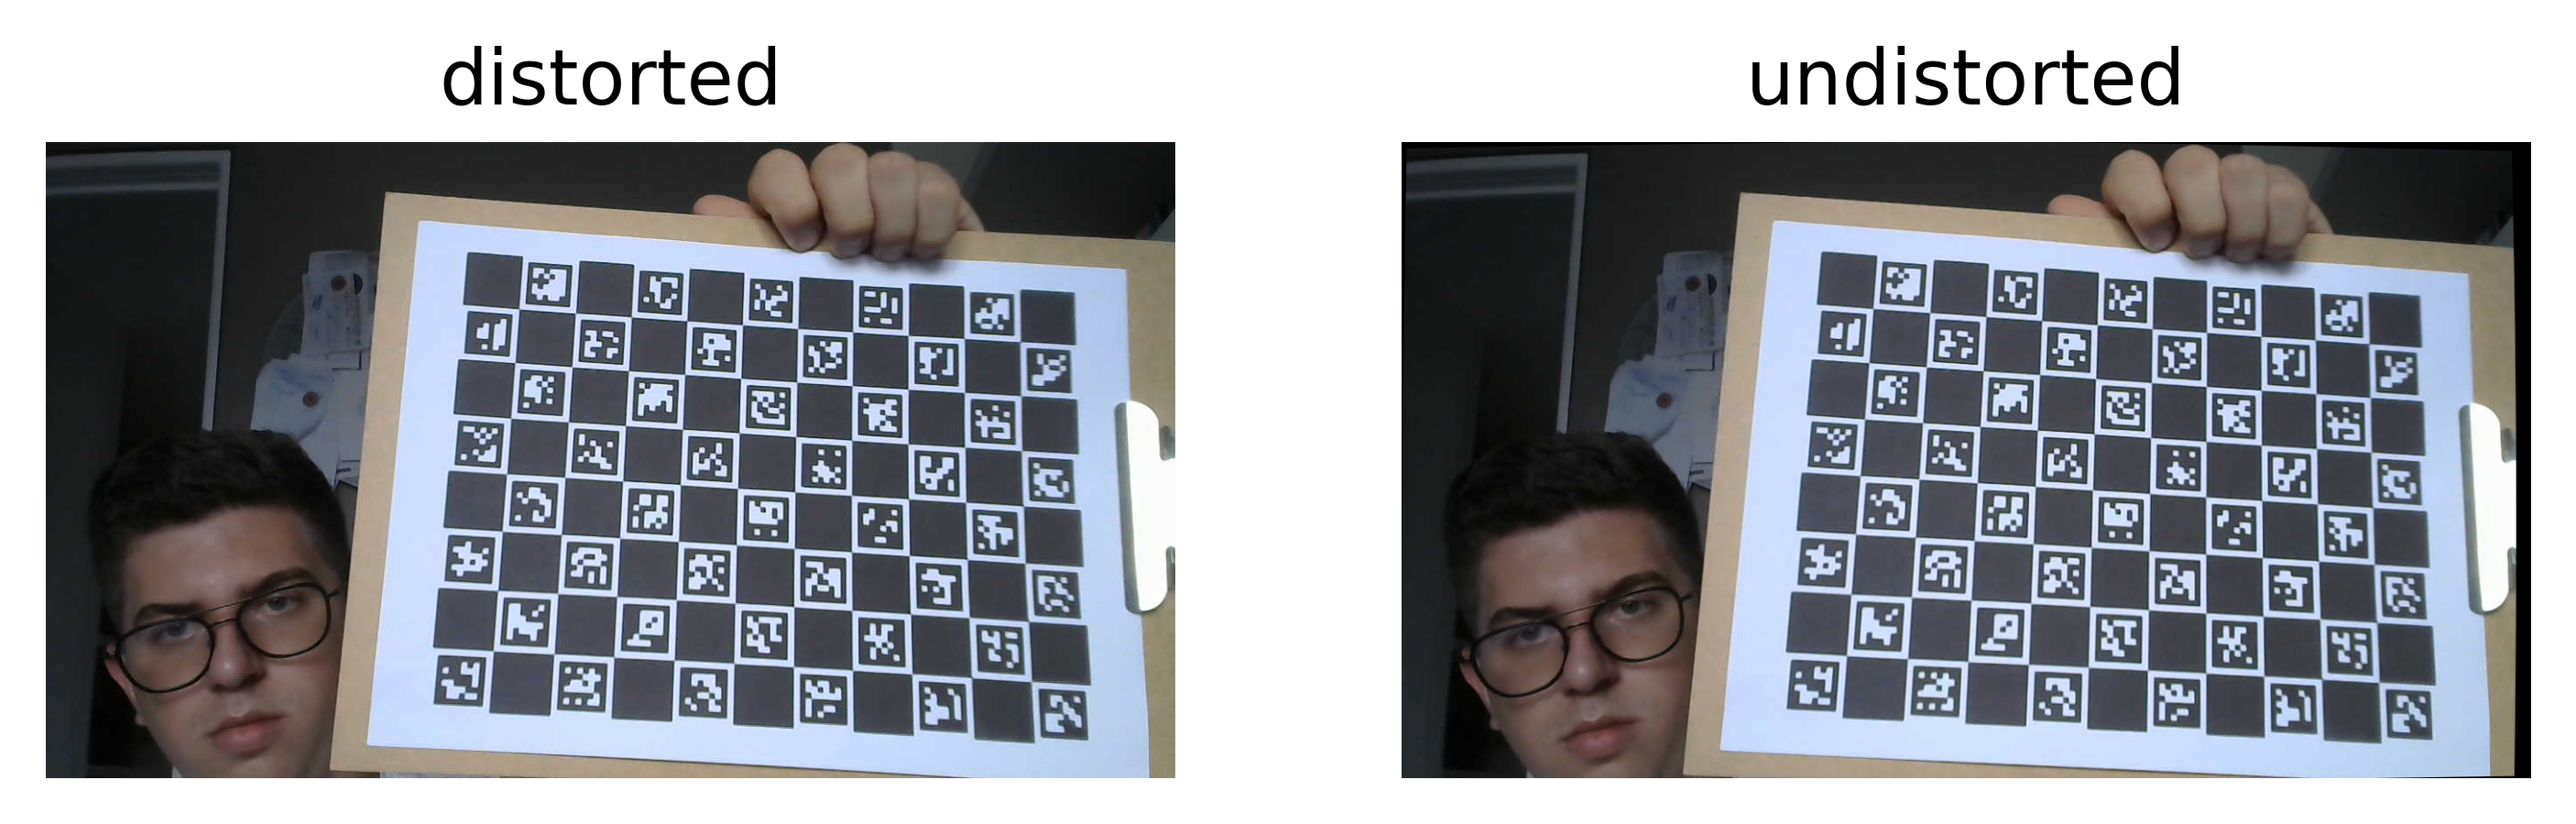

In [13]:
image = cv2.imread("patternsImages/calibImg10.jpg")

newCameraMatrix, roi = cv2.getOptimalNewCameraMatrix(cameraMatrix, distCoefficients, imageSize, 1, imageSize)
undistortedImage = cv2.undistort(image, cameraMatrix, distCoefficients, None, newCameraMatrix)

ig, axs = plt.subplots(1,2,figsize=(7, 4), dpi=500)
axs[0].imshow(image[:,:,::-1])
axs[0].axis('off')
axs[0].set_title('distorted')
axs[1].imshow(undistortedImage[:,:,::-1])
axs[1].axis('off')
axs[1].set_title('undistorted')